In [46]:
import matplotlib.pyplot as plt
import glob
import zipfile
import io
import pandas as pd

In [50]:
mu_list = glob.glob('dmft_results/mu_*')

for mu in mu_list:
    beta_file_list = glob.glob(f'{mu}/beta_*')
    beta_list = []
    order_parameter_list = []
    
    for beta_file in beta_file_list:
        beta = float(beta_file.split('/')[-1].split('_')[1].strip('.zip'))
        beta_list.append(beta)
        
        with zipfile.ZipFile(f'{beta_file}', 'r') as beta_zip:
            with io.TextIOWrapper(beta_zip.open(f'beta_{beta}/dmft.result')) as f:
                ifile = iter(f.readlines())
                for line in ifile:
                    if line.startswith('# orbital    2    1'):
                        order_parameter_list.append(float(next(ifile, '').strip()))
    
    
    results = pd.DataFrame({'beta': beta_list, 'order_parameter': order_parameter_list})
    results.sort_values(by=["beta"], inplace=True)

Text(0, 0.5, 'Order parameter')

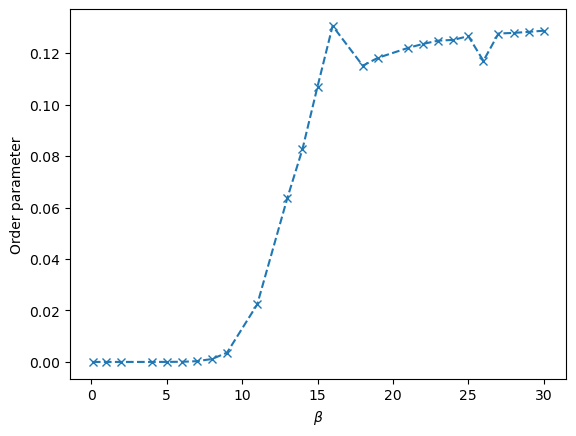

In [54]:
plt.plot(results.loc[:,'beta'], results.loc[:,'order_parameter'] , 'x--')
plt.xlabel("$\\beta$")
plt.ylabel("Order parameter")